In [9]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import json
from collections import Counter

def load_history(filename):
    with open(filename) as json_file:  
        return json.load(json_file)

## Analysis of the CIFAR-10 data set

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

input_shape = x_train.shape[1:]
num_classes = np.unique(y_train).shape[0]

print("number of classes:", num_classes)
print("input shape:", input_shape)
print("Image data type:", x_train.dtype)

('x_train shape:', (50000, 32, 32, 3))
(50000, 'train samples')
(10000, 'test samples')
('number of classes:', 10)
('input shape:', (32, 32, 3))
('Image data type:', dtype('uint8'))


The dataset consists of 60000 images of size 32x32 pixels. The images are rgb (3 channels). There are 10 classes in the dataset.

### Visualization of some images

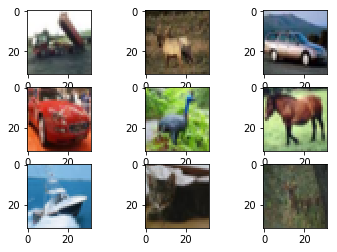

In [4]:
for row in range(3):
    for col in range(3):
        idx = row * 3 + col + 1
        plt.subplot(3,3, idx)
        plt.imshow(x_train[idx + 1])

### Class distribution

(50000, 1)


<BarContainer object of 10 artists>

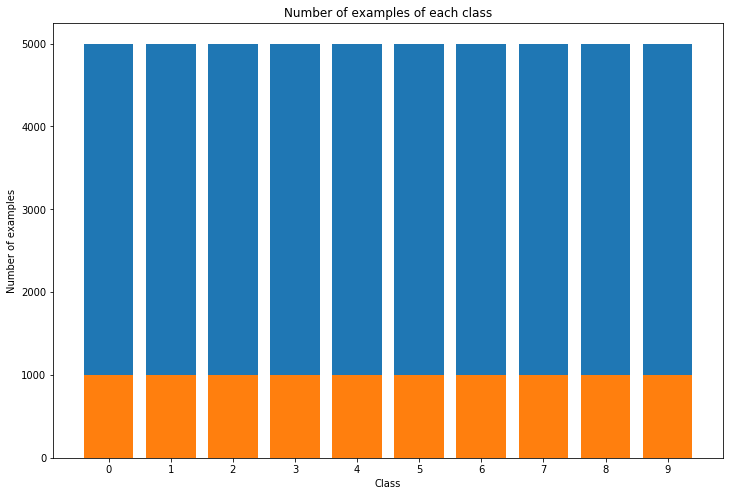

In [5]:
print(y_train.shape)
class_distribution_train = Counter(y_train[:,0])
class_distribution_test = Counter(y_test[:,0])
x = range(10)
train_y = [class_distribution_train[cls] for cls in x]
test_y = [class_distribution_test[cls] for cls in x]
plt.figure(figsize=(12,8))
plt.xticks(x)
plt.title("Number of examples of each class")
plt.xlabel("Class")
plt.ylabel("Number of examples")
plt.bar(x, train_y)
plt.bar(x, test_y)

## Data augmentation
Augment training data using rotation, shifting and horizontal flipping.
Pictures might be taken at different angles, and the position of the object in the picture can vary, in addition to being mirrored horizontaly, thus rotating the objects by a small angle (<15 degrees), shifting them by small values (<10%) and flipping horizontally, will increase the variety of the training data. It is reasonable to believe that the network should still be able to classify the images under these conditions.
### Visualization

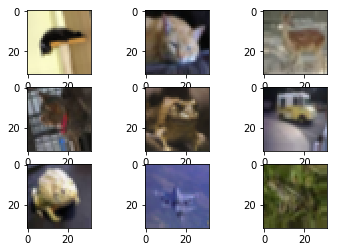

In [8]:
x_train = x_train.astype('float16')
x_test = x_test.astype('float16')
x_train /= 255
x_test /= 255

datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

for x_batch, y_batch in datagen.flow(x_train,
                                     y_train,
                                     batch_size=9):
    for i in range(0, 9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(x_batch[i])
    plt.show()
    break

Data augmentation gives more varied training data, and prevents overfitting.

### Results of data augmentation
We trained the network in table 2 (model1) both without and with data augmentation, and data augmentation helped reduce overfitting drastically, and we were able to increase our accuracy from 70.2% to 77.3% - a quite substantial increase. The model has 160000 parameters, and 42500 training images are a bit too low to train such a large parameter count by itself. Data augmentation is a way to 'cheat', adding more training images from the ones you already have, giving the same effects as having more training data.

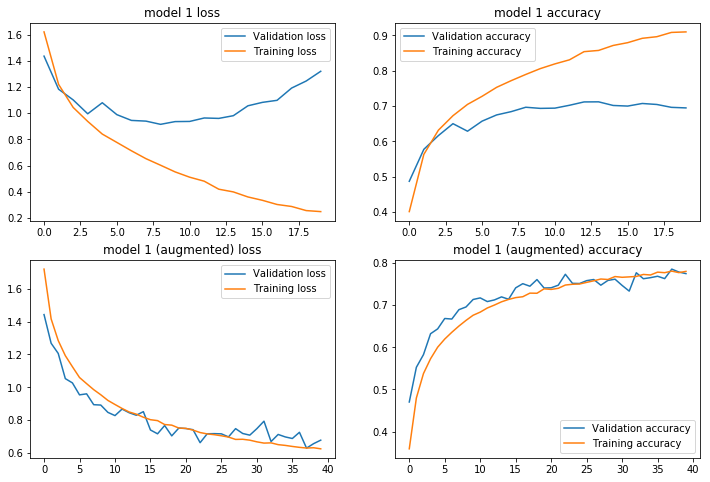

In [13]:
model1_aug_history = load_history("model1_history_1542800949.72.json")
model1_history = load_history("model1_history_1542817000.57.json")

plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
plt.plot(model1_history["val_loss"], label="Validation loss")
plt.plot(model1_history["loss"], label="Training loss")
plt.title("model 1 loss")
plt.legend()

plt.subplot(2, 2, 2)
plt.title("model 1 accuracy")
plt.plot(model1_history["val_acc"], label="Validation accuracy")
plt.plot(model1_history["acc"], label="Training accuracy")
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(model1_aug_history["val_loss"], label="Validation loss")
plt.plot(model1_aug_history["loss"], label="Training loss")
plt.title("model 1 (augmented) loss")
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(model1_aug_history["val_acc"], label="Validation accuracy")
plt.plot(model1_aug_history["acc"], label="Training accuracy")
plt.title("model 1 (augmented) accuracy")
plt.legend()

## Models